In [781]:
#Installing the repository
#!pip install ucimlrepo

In [782]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importing the Dataset

In [783]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [784]:
#Concatanating the feature & target values into a single dataframe
df = pd.concat([X, pd.DataFrame(y, columns=['income'])], axis=1)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


# Exploratory Data Analysis (EDA)

In [785]:
df.shape

(48842, 15)

In [786]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [787]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [788]:
df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

It can be seen that null values exist for some fields

In [789]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Data Cleaning

## 1. Handling Duplicate Values

In [790]:
#Checking if there are any duplicate values in the dataset
#Displaying duplicate values if there are any
print(df[df.duplicated()])

       age         workclass  fnlwgt     education  education-num  \
4881    25           Private  308144     Bachelors             13   
5104    90           Private   52386  Some-college             10   
9171    21           Private  250051  Some-college             10   
11631   20           Private  107658  Some-college             10   
13084   25           Private  195994       1st-4th              2   
15059   21           Private  243368     Preschool              1   
17040   46           Private  173243       HS-grad              9   
18555   30           Private  144593       HS-grad              9   
18698   19           Private   97261       HS-grad              9   
21318   19           Private  138153  Some-college             10   
21490   19           Private  146679  Some-college             10   
21875   49           Private   31267       7th-8th              4   
22300   25           Private  195994       1st-4th              2   
22367   44           Private  3677

Since duplicate values exist, these should be removed.

In [791]:
#Removing the duplicate values
df = df.drop_duplicates()

In [792]:
#Checking for unique values
unique_values = df.nunique()
unique_values

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [793]:
for columns in df:
    print(columns)
    print(df[columns].unique())
    print()  

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'


## 2. Handling Unnecessary Values

In [794]:
#Creating a copy of the dataframe since changes cannot be directly applied
df = df.copy()

When displaying the unique values, there were punction marks in the income values which are unnecessary. So, they must be removed.

In [795]:
#Removing the punctuation mark (".") in the income field
df['income'] = df['income'].str.replace(".", "")

## 3. Removing Unnecessary Blank Spaces

In [796]:
#Removing the blank spaces in the object values
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].str.strip(" ")

## 4. Handling Missing Values

Question mark symbols were found as values when exploring. So they are gonna be replaced with null values

In [797]:
#Replacing question mark symbols ('?') with 'NA'
df.replace('?', pd.NA, inplace=True)

In [798]:
df.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     856
income               0
dtype: int64

Therefore, it can be there are null values in 3 fields.

### Analysing the 'native-country' Column

In [799]:
#Getting the value counts of 'native-country'
df["native-country"].value_counts()

native-country
United-States                 43810
Mexico                          947
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

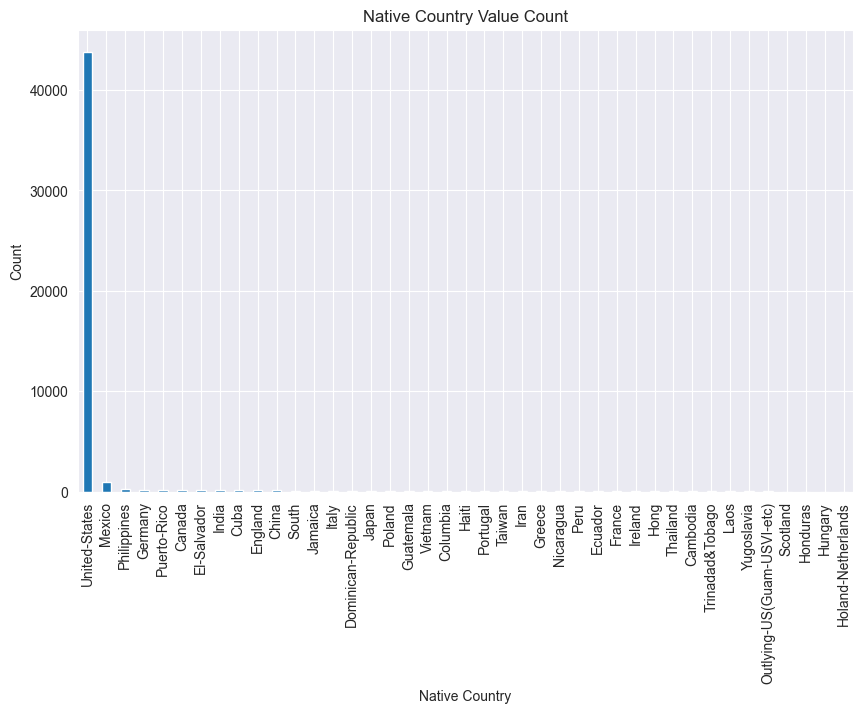

In [800]:
#Plotting the 'native-country'
plt.figure(figsize=(10, 6))
native_country_count.plot(kind='bar')
plt.title('Native Country Value Count')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.show()

It can be seen that almost all of the data belong to United States. Therefore, removing this field seems best.

In [801]:
#Dropping the 'native-country' column
df.drop(columns=['native-country'], inplace=True)

### Analysing the 'capital-gain' & 'capital-loss' Columns

In [802]:
#Getting the value counts of 'capital-gain'
df["capital-gain"].value_counts()

capital-gain
0        44778
15024      513
7688       410
7298       364
99999      244
         ...  
22040        1
2387         1
1639         1
1111         1
6612         1
Name: count, Length: 123, dtype: int64

In [803]:
#Getting the value counts of 'capital-loss'
df["capital-loss"].value_counts()

capital-loss
0       46531
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
1870        1
1911        1
2465        1
1421        1
Name: count, Length: 99, dtype: int64

Therefore, it can be seen that a large number of values for the value '0' exists. Since these type of data affect the effiency & accuracy of the data, it is better to remove these columns.

In [804]:
df.drop(columns=['capital-loss','capital-gain'], inplace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,36,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,40,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40,<=50K


### Replacing Missing Values with the Mode

In [805]:
#Imputing missing values with the most frequent value (mode) for categorical features
for col in ['workclass', 'occupation']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [806]:
#Checking null values
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64

# Data Visualization

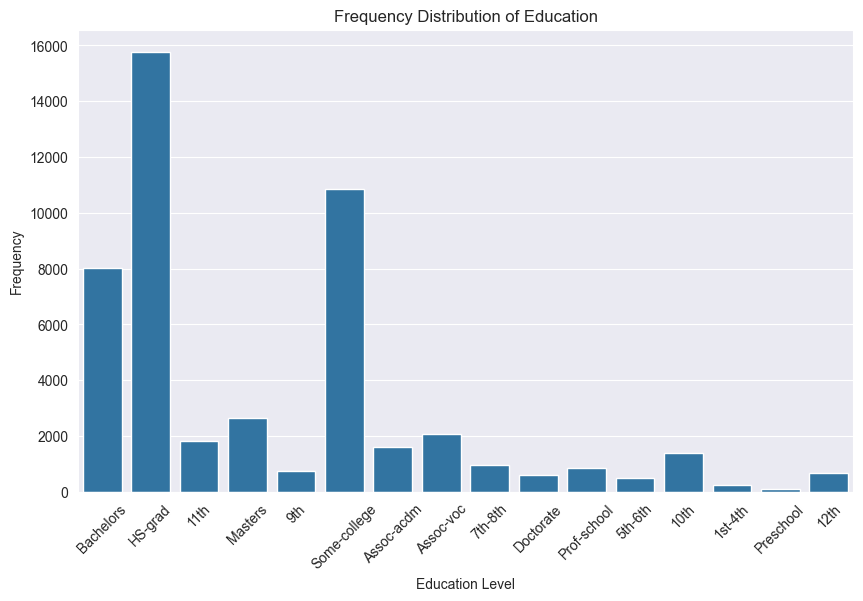

In [807]:
#Plotting distribution of Education
plt.figure(figsize=(10, 6))

sns.countplot(x='education', data=df)
plt.xticks(rotation=45)  
plt.title('Frequency Distribution of Education')
plt.xlabel('Education Level')   
plt.ylabel('Frequency')
plt.show()

In [808]:
#Getting the counts for each education category
Education=df['education'].value_counts()
e1= list(Education.index)

Education_Num=df['education-num'].value_counts()
e2= list(Education_Num.index)

Text(0.5, 1.0, 'Education Num')

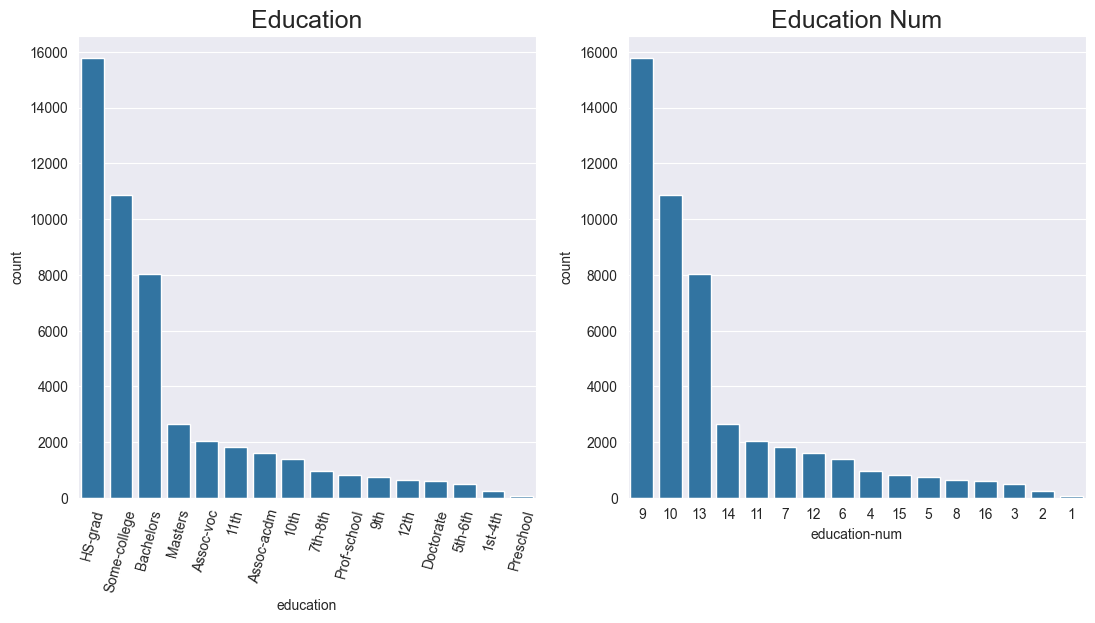

In [809]:
plt.figure(figsize=(13, 6))

plt.subplot(1, 2, 1)
plot1 = sns.countplot(data=df, x='education', order=e1)
plt.title('Education', fontsize=18)
plt.xticks(rotation=75)

plt.subplot(1, 2, 2)
plot2 = sns.countplot(data=df, x='education-num', order=e2)
plt.title('Education Num', fontsize=18)

Both of these columns are identical. Therefore, one can be removed.

In [810]:
df.drop('education', axis=1, inplace=True)

## Handling Outliers

### Outliers in the 'age' feature

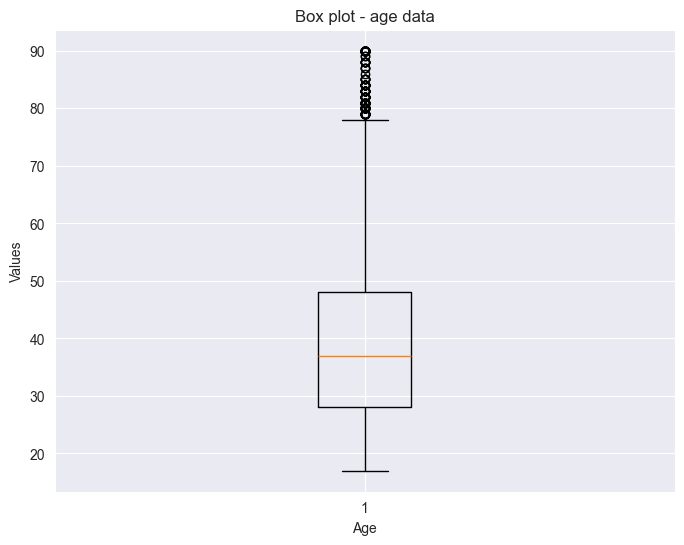

In [811]:
#Displaying the 'age' feature in a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['age'])
plt.title('Box plot - age data')
plt.xlabel('Age')
plt.ylabel('Values')
plt.show()

In [812]:
#Calculating Q1, Q3, and IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

#Computing upper whisker value
upper_whisker = Q3 + 1.5 * IQR

#Finding the highest data point within the upper whisker
upper_bound = df['age'][df['age'] <= upper_whisker].max()

print("Upper Bound:", upper_bound)

Upper Bound: 78


It can be seen that several outliers are available.

In [813]:
#Visualizing the data of people above age 75
above75_high_income = df[(df['age'] >= 75) & (df['income'] == '>50K')]['age'].value_counts()
above75_low_income = df[(df['age'] >= 75) & (df['income'] == '<=50K')]['age'].value_counts()
print(f'people who earn more than 50k & above the age 75:  {above75_high_income.sum()}')
print(f'people who earn below 50k & above the age 75:  {above75_low_income.sum()}')

people who earn more than 50k & above the age 75:  72
people who earn below 50k & above the age 75:  372


<Axes: title={'center': 'Earning less than 50k'}, xlabel='age', ylabel='Count'>

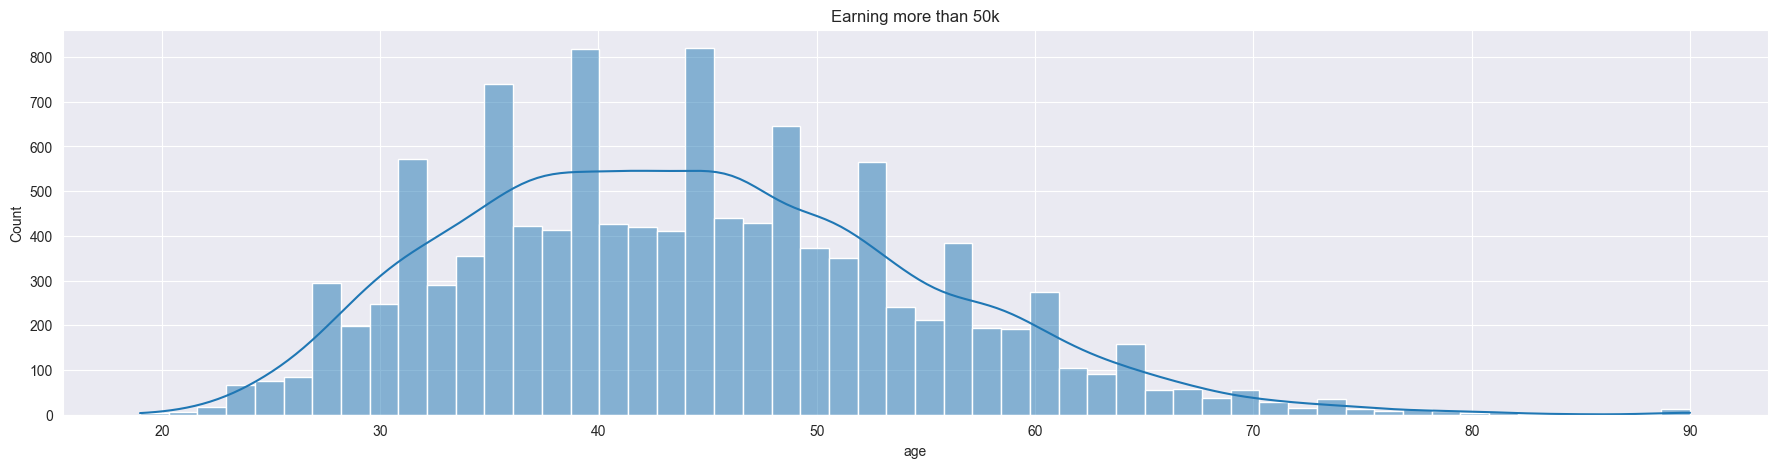

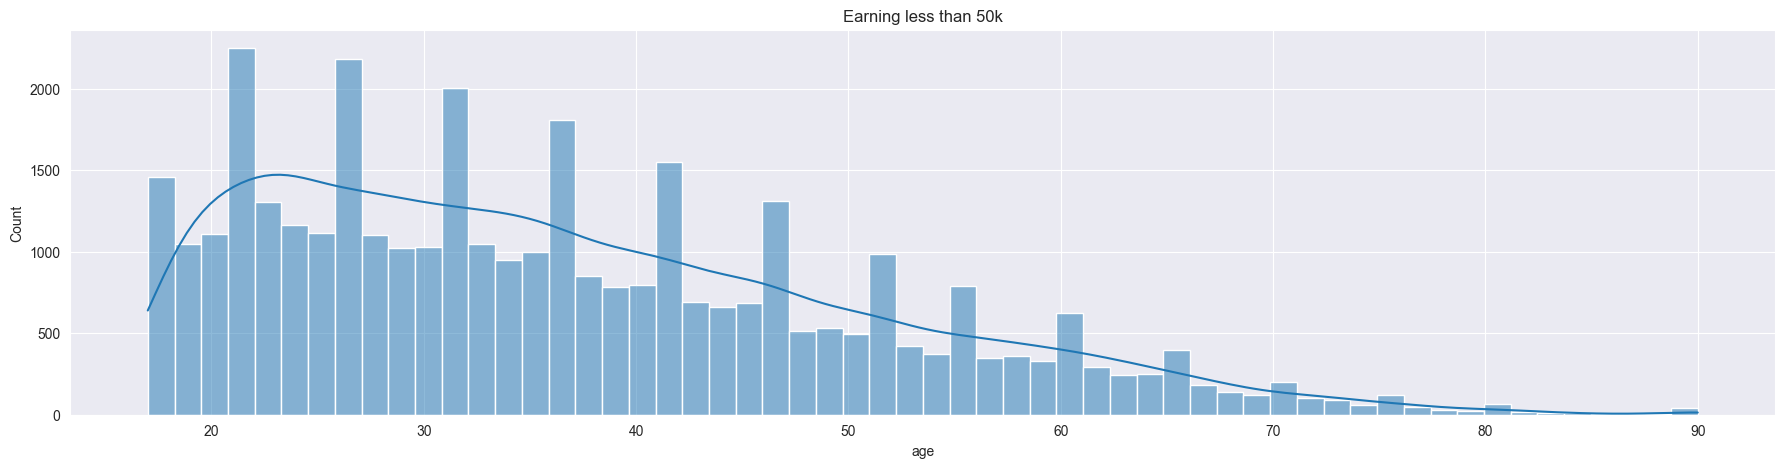

In [814]:
#Checking the earnings throughout the aging with KDE (Kernal Density Estimation)
above50k_earn = df[df['income'] == '>50K']['age']
plt.figure(figsize=(22, 5))
plt.title("Earning more than 50k")
sns.histplot(above50k_earn,kde=True, label=columns)

below50k_earn = df[df['income'] == '<=50K']['age']
plt.figure(figsize=(22, 5))
plt.title("Earning less than 50k")
sns.histplot(below50k_earn,kde=True, label=columns)

<Axes: title={'center': 'Earning more than 50k'}>

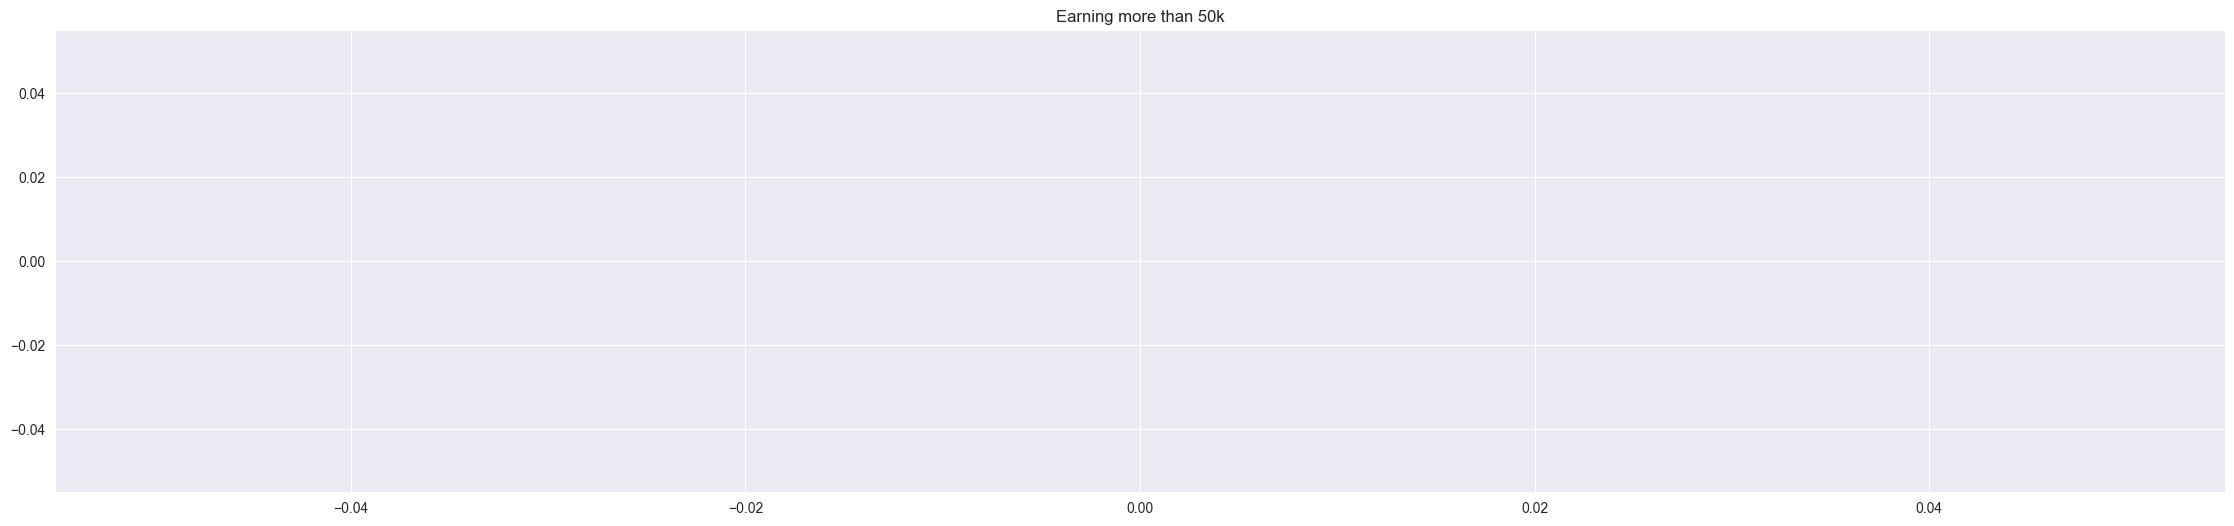

In [842]:
#Dropping the outliers of the people who earn more than 50K 
df = df.drop(df[(df['age'] >= 75) & (df['income'] == '>50K')].index)

#Plotting the distribution
above50k_earn = df[df['income'] == '>50K']['age']
plt.figure(figsize=(28, 6))
plt.title("Earning more than 50k")
sns.histplot(above50k_earn,kde=True, label=columns)

<Axes: title={'center': 'Earning less than 50k'}, xlabel='age', ylabel='Count'>

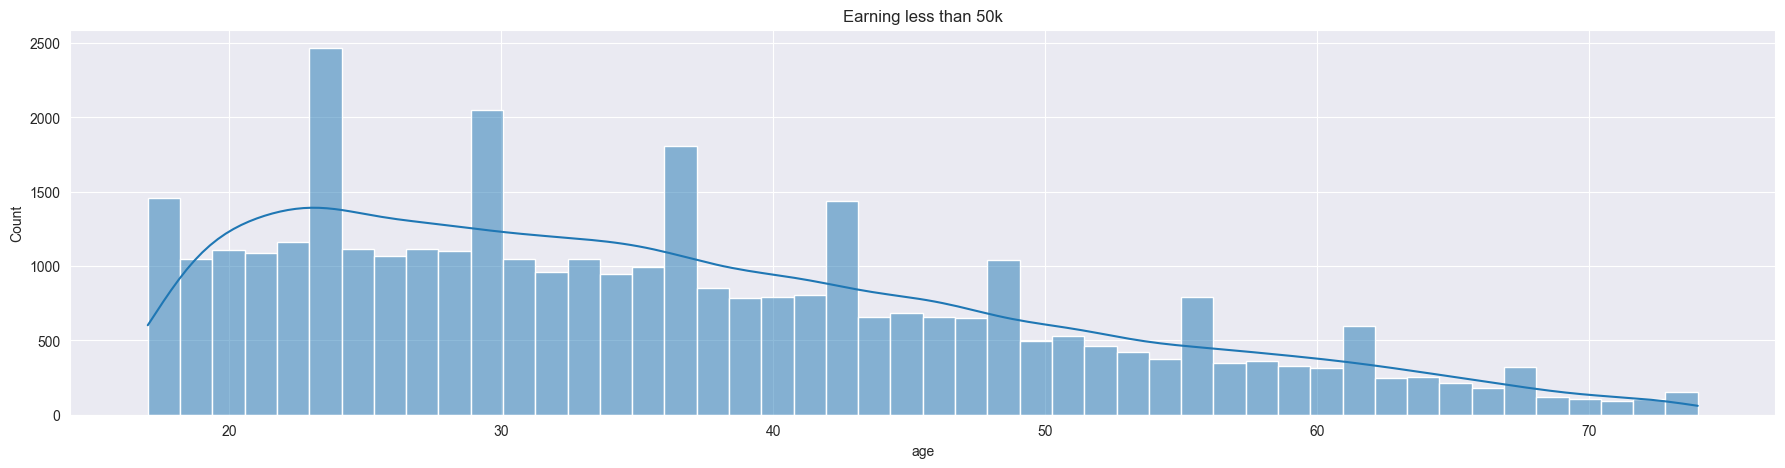

In [816]:
#Dropping the outliers of the people who earn less than 50K 
df = df.drop(df[(df['age'] >= 75) & (df['income'] == '<=50K')].index)

#Plotting the distribution
below50k_earn = df[df['income'] == '<=50K']['age']
plt.figure(figsize=(22, 5))
plt.title("Earning less than 50k")
sns.histplot(below50k_earn,kde=True, label=columns)

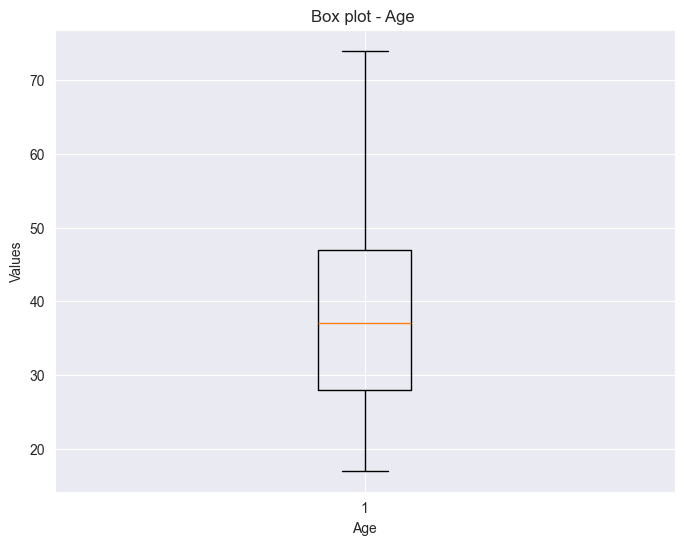

In [817]:
#Plotting after handling the outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['age'])
plt.title('Box plot - Age ')
plt.xlabel('Age')
plt.ylabel('Values')
plt.show()

### Outliers in the 'fnlwgt' (Final Weight) feature

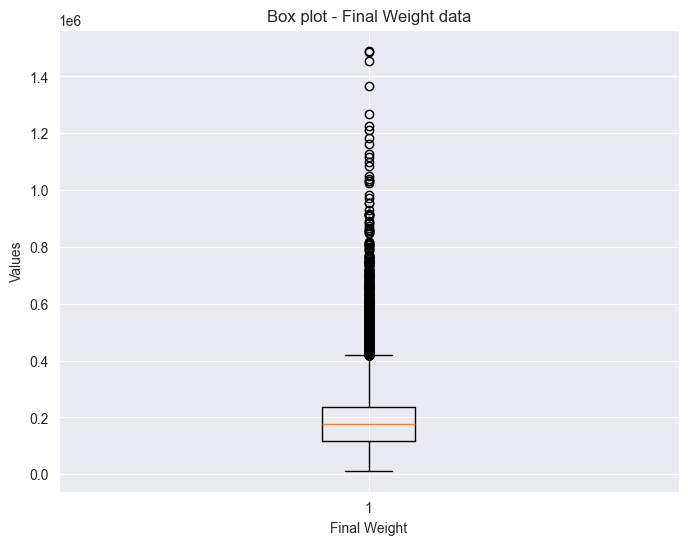

In [818]:
#Plotting the final weight column
plt.figure(figsize=(8, 6))
plt.boxplot(df['fnlwgt'])
plt.title('Box plot - Final Weight data')
plt.xlabel('Final Weight')
plt.ylabel('Values')
plt.show()

In [819]:
#Calculating Q1, Q3, and IQR
Q1 = df['fnlwgt'].quantile(0.25)
Q3 = df['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1

#Computing upper whisker value
upper_whisker = Q3 + 1.5 * IQR

#Finding the highest data point within the upper whisker
upper_bound_data = df['fnlwgt'][df['fnlwgt'] <= upper_whisker].max()

print("Upper Bound:", upper_bound_data)

#Number of records above the upper bound 
fnlwgt_outliers = df[df['fnlwgt'] >= 417419].value_counts().sum()
print(f'number of outliers :- {fnlwgt_outliers}')

Upper Bound: 418324
number of outliers :- 1458


In [820]:
#Removing the final weight outliers
adult_dataset = df.drop(df[df['fnlwgt'] >= 417419].index)

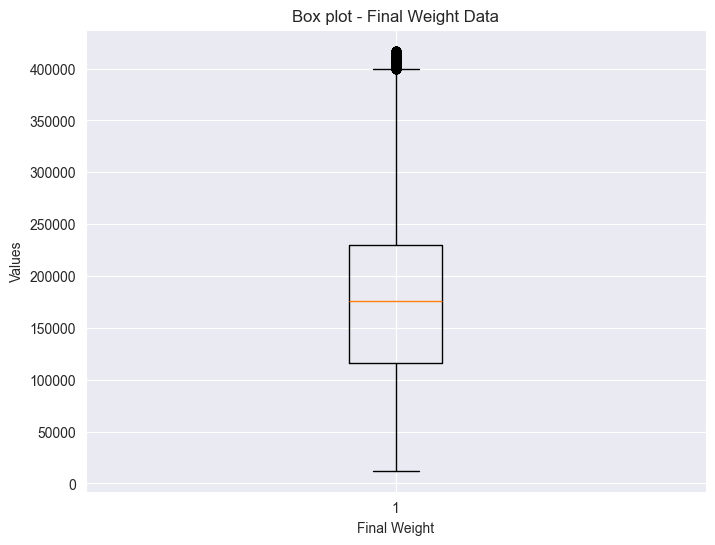

In [821]:
#Plotting the final weight column
plt.figure(figsize=(8, 6))
plt.boxplot(adult_dataset['fnlwgt'])
plt.title('Box plot - Final Weight Data')
plt.xlabel('Final Weight')
plt.ylabel('Values')
plt.show()

### Outliers in the 'hours-per-week' feature

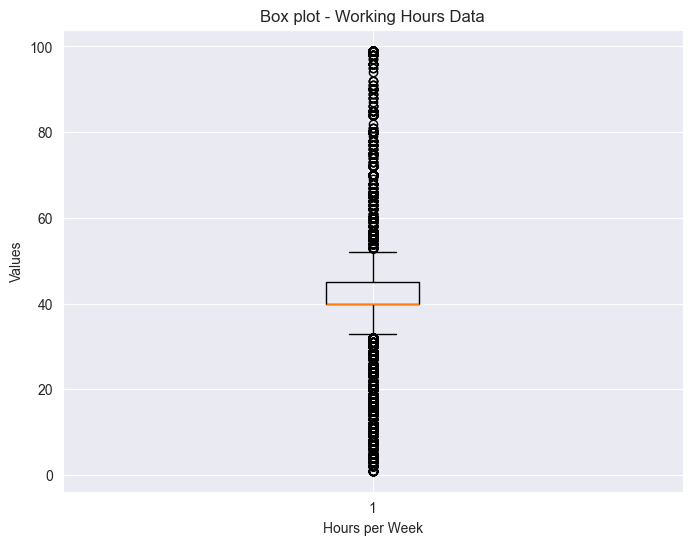

In [822]:
#Plotting the working hours feature
plt.figure(figsize=(8, 6))
plt.boxplot(df['hours-per-week'])
plt.title('Box plot - Working Hours Data')
plt.xlabel('Hours per Week')
plt.ylabel('Values')
plt.show()

#   Feature Engineering

## Encoding Lables

In [823]:
from sklearn.preprocessing import LabelEncoder

#Defining the categorical columns to be encoded
categorical_columns = ['workclass','education-num','marital-status','occupation','relationship','race','sex','income']

#Initializing the LabelEncoder
label_encoder = LabelEncoder()

#Applying LabelEncoder to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

## Correlation Matrix

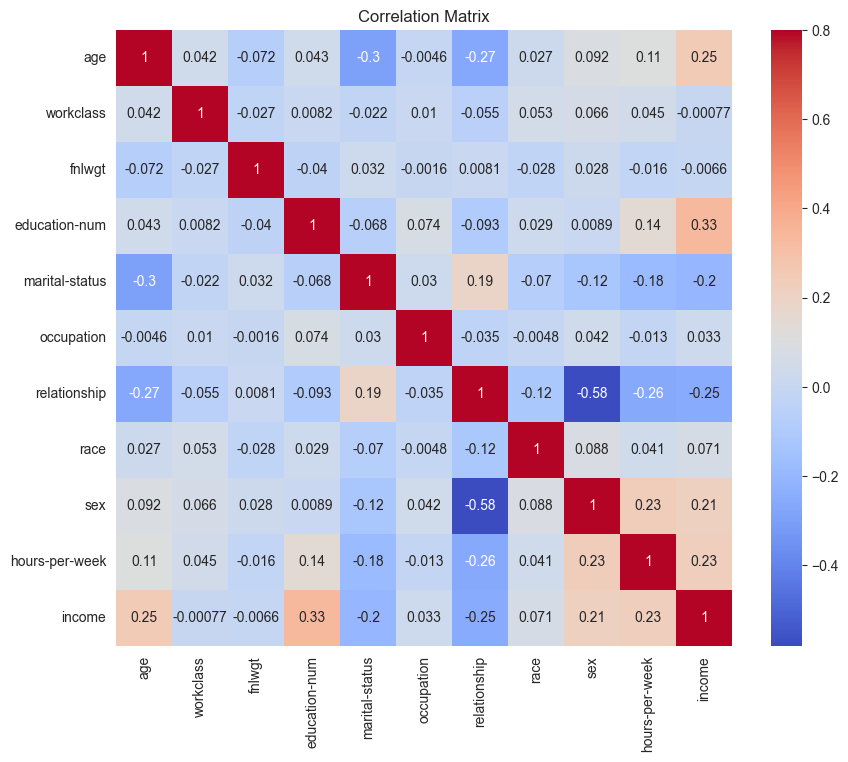

In [824]:
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, vmax=0.8, square=True, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data Scaling

In [825]:
from sklearn.preprocessing import StandardScaler

#Splitting data into features and target
X = df.drop('income', axis=1)
y = df['income']

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

# Splitting of Data

In [826]:
from sklearn.model_selection import train_test_split

#Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [827]:
#Training the Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [828]:
#Model Evaluation
#Evaluating the Naïve Bayes model
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naïve Bayes Accuracy:", nb_accuracy)
print("Naïve Bayes Classification Report:\n", classification_report(y_test, nb_pred))
print("Naïve Bayes Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))

Naïve Bayes Accuracy: 0.782819929708497
Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85      7348
           1       0.54      0.69      0.61      2326

    accuracy                           0.78      9674
   macro avg       0.72      0.75      0.73      9674
weighted avg       0.81      0.78      0.79      9674

Naïve Bayes Confusion Matrix:
 [[5959 1389]
 [ 712 1614]]


In [829]:
#Training the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [830]:
#Evaluating the Random Forest model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))


Random Forest Accuracy: 0.8259251602232789
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      7348
           1       0.66      0.57      0.61      2326

    accuracy                           0.83      9674
   macro avg       0.76      0.74      0.75      9674
weighted avg       0.82      0.83      0.82      9674

Random Forest Confusion Matrix:
 [[6661  687]
 [ 997 1329]]


In [831]:
#Model Comparison
print("\nModel Comparison:")
print("Naïve Bayes Accuracy:", nb_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


Model Comparison:
Naïve Bayes Accuracy: 0.782819929708497
Random Forest Accuracy: 0.8259251602232789


## Applying the Principal Component Analysis (PCA)

In [832]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)

In [833]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)
column_to_drop_index = np.argmin(explained_variance_ratio)
column_to_drop_index

[0.20427792 0.11441915 0.10756935 0.10310973 0.09689713 0.09474259
 0.09333273 0.07888897 0.06786816 0.03889427]


9

In [834]:
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
pca = PCA(n_components=num_components)

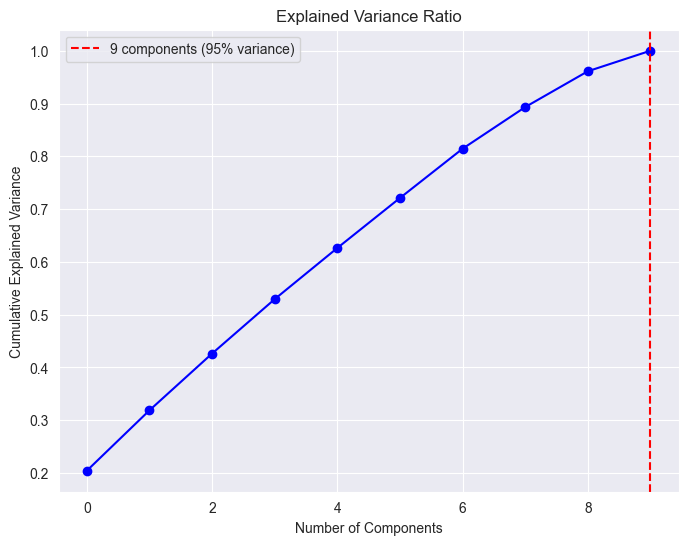

In [835]:
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.axvline(x= num_components, color='r', linestyle='--', label=f'{num_components} components (95% variance)')
plt.legend()
plt.grid(True)
plt.show()

In [836]:
pca = PCA(n_components=9)
new_data = pca.fit_transform(df)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data=new_data, columns=['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9'])


In [837]:
principal_Df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9
0,-112421.944844,-0.564190,-0.433806,-5.869328,-3.279539,0.041755,1.744309,2.869769,-0.073402
1,-106626.944894,-3.817702,-29.386092,-2.921114,-3.945532,-2.093300,0.331179,1.845040,0.003295
2,25708.055162,-0.178173,-0.435490,-1.247696,0.844274,-1.636962,-2.174961,-0.083372,-0.191695
3,44783.055029,13.023418,-7.785417,-1.364248,2.976040,-1.030906,0.283286,-0.324665,1.733934
4,148471.055244,-8.022981,4.092979,3.019016,-2.714331,2.970230,-2.264654,0.092327,1.403043


In [838]:
X = principal_Df
y = df["income"]

In [839]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [840]:
#Training the Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

#Evaluating the model
print("Naïve Bayes Model:")
print(classification_report(y_test, nb_pred))
print("Accuracy:", accuracy_score(y_test, nb_pred))

Naïve Bayes Model:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      7348
           1       0.77      0.11      0.19      2326

    accuracy                           0.78      9674
   macro avg       0.77      0.55      0.53      9674
weighted avg       0.78      0.78      0.71      9674

Accuracy: 0.7778581765557163


In [841]:
#Training the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

#Evaluating the model
print("\nRandom Forest Model:")
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Model:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7348
           1       0.84      0.71      0.77      2326

    accuracy                           0.90      9674
   macro avg       0.87      0.83      0.85      9674
weighted avg       0.89      0.90      0.89      9674

Accuracy: 0.8963200330783544
